# OLS & GLM

*** Modelling Count & Frequency Data***
- [An Illustrated Guide to the Poisson Regression Model](https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958)
- [Negative Binomial Regression: A Step by Step Guide](https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4)
- [Using Statsmodels GLMs to model Beverage Consumption](https://dius.com.au/2017/08/03/using-statsmodels-glms-to-model-beverage-consumption/)
- [Logistic Regression](http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html)
- [Logistic Regression in Python](https://realpython.com/logistic-regression-python/)



In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = pd.read_csv('data.txt', sep='\t')
#dat['Intercept'] = 1
dat.rename(columns={'Y':'Prem'}, inplace=True)
dat[:2]

,Prem,Ind1,Ind2,revenue
0,505,1,0,2539
1,207,1,0,11119


In [3]:
Y = dat['Prem'].copy()
X = dat.loc[:, 'Ind1':].copy()

In [4]:
#help(sm.OLS)

In [5]:
model = sm.OLS(Y,X, hasconst=False) # create model using data
fit = model.fit() # fit
results = fit # ger results from fit
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Prem   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              124.7
Date:                Sat, 04 Apr 2020   Prob (F-statistic):                    2.20e-22
Time:                        17:02:07   Log-Likelihood:                         -382.88
No. Observations:                  50   AIC:                                      771.8
Df Residuals:                      47   BIC:                                      777.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ind1         514.6186    159.591      3.225      0.002     193.562     835.675
Ind2        1613.7044    283.655      5.689      0.000    1043.064    2184.345
revenue        0.0143      0.013      1.094      0.279      -0.012       0.041
==============================================================================
Omnibus:                       10.204   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.399
Skew:                           0.285   Prob(JB):                        0.183
Kurtosis:                       1.857   Cond. No.                     6.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
#help(model)

In [7]:
dat['Pred1'] = fit.predict(X)
dat['Res1'] = dat['Pred1'] - dat['Prem']
dat[:3]

,Prem,Ind1,Ind2,revenue,Pred1,Res1
0,505,1,0,2539,550.985638,45.985638
1,207,1,0,11119,673.880212,466.880212
2,520,1,0,12887,699.203942,179.203942


In [8]:
SE = dat['Res1'].std()/np.sqrt(len(dat)-1) #Standard Error
SE

73.91174968684872

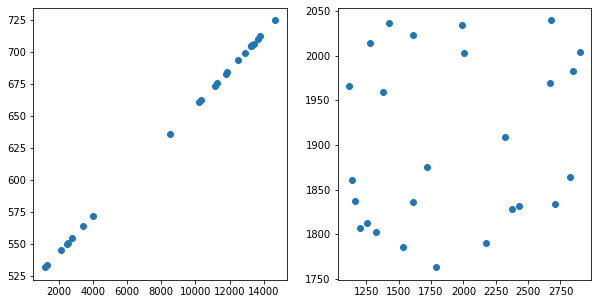

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
axs = [ax1,ax2]
ind1 = dat.loc[dat['Ind1']==1].copy()
ind2 = dat.loc[dat['Ind1']==0].copy()

ax1.scatter(ind1['revenue'],ind1['Pred1'])
ax2.scatter(ind2['Prem'],ind2['Pred1'])

